## Introduction
Super store Sales analyis is a real time case study from the retail domain. The data set contains Customer information,Product information,sales, profit and geographical information of the Store.

### Business Objective
Previous sales information is given to us. Our objective is to gather insights from the previous sales and use those insights to obtain large profits in the future and also to identify the weak areas so as to focus on them and improve them to boost the business growth.

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to show the complete dataset
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

#### Preview of the data

In [2]:
sales=pd.read_excel('orders.xlsx')
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Shape of the data

In [3]:
sales.shape

(9994, 21)

The dataset has 9800 records and 18 columns

#### Column Data Types

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Row ID does not contain relevant information,therefore it is not necessary in the analysis and Postal Code is more of a categorical variable  

#### Statistical information

In [5]:
sales.describe(include='all')

C:\Users\ASHOK\AppData\Local\Temp/ipykernel_21432/2713462175.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales.describe(include='all')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750


#### Unique values

In [6]:
sales.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

#### Checking for outliers

Sales


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


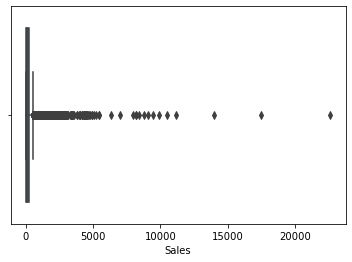

Quantity


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


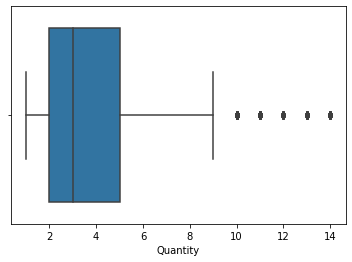

Discount


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


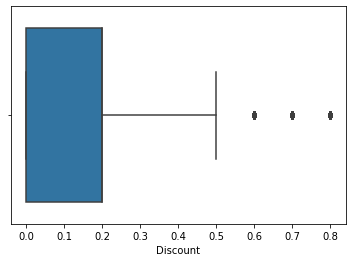

Profit


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


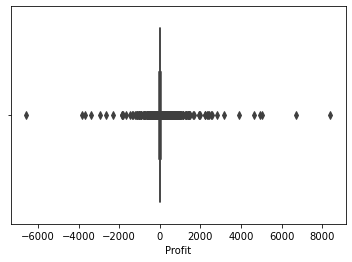

In [7]:
cols=['Sales','Quantity','Discount','Profit']
for i in cols:
    print(i)
    sns.boxplot(sales[i])
    plt.show()

Outliers are present in all of the numerical columns but Sales and Profit has a large margin of ouliers in them.

#### Checking for missing data

In [8]:
sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

We can observe that no values were missing from the dataset

#### Checking for Duplicated records

In [9]:
sales.duplicated().sum()

0

No duplicate records were found in the dataset

#### Changing the Data type for the necessary columns

In [10]:
sales['Postal Code']=pd.Categorical(sales['Postal Code'])

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   category      
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### Creating new columns for the dates in Order Date and Ship Date columns

In [12]:
sales['order_year']=sales['Order Date'].dt.year
sales['order_month']=sales['Order Date'].dt.month
sales['order_date']=sales['Order Date'].dt.day
sales['ship_year']=sales['Ship Date'].dt.year
sales['ship_month']=sales['Ship Date'].dt.month
sales['ship_date']=sales['Ship Date'].dt.day


### Univariate Analysis

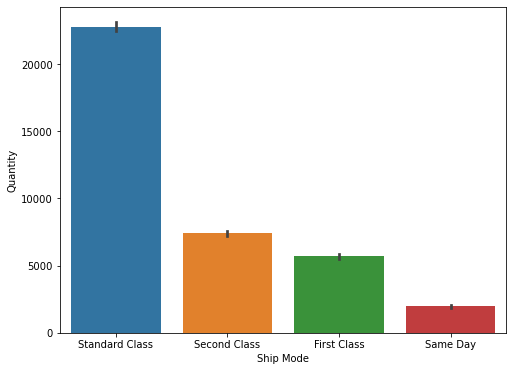

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Ship Mode',y='Quantity',estimator=np.sum,order=sales['Ship Mode'].value_counts().index)
plt.show()

Standard Class is the most popular shipping mode

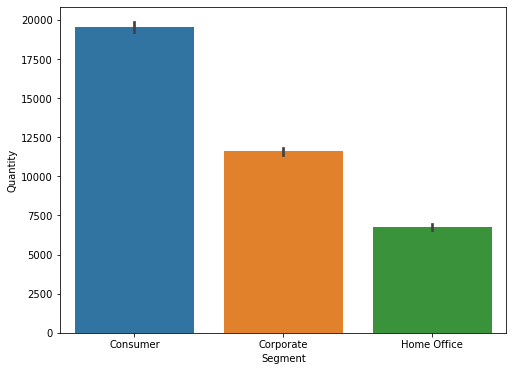

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Segment',y='Quantity',estimator=np.sum,order=sales['Segment'].value_counts().index)
plt.show()

We can see that Consumer products are the most selling products in the store and Home office products are the least selling

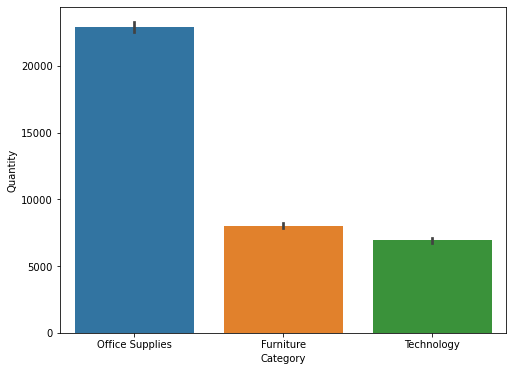

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Category',y='Quantity',estimator=np.sum,order=sales['Category'].value_counts().index)
plt.show()

Office supplies is the most popular category and Technology is the least popular category

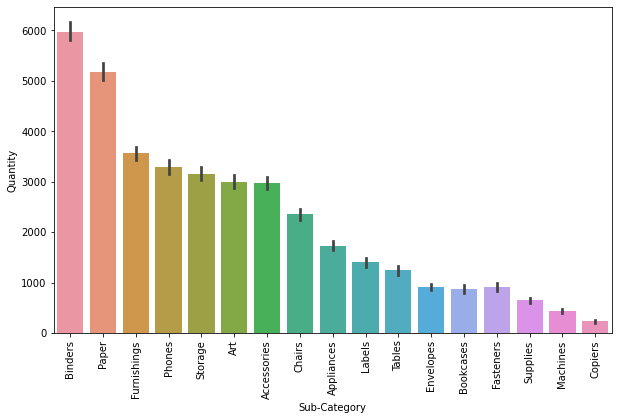

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales,x='Sub-Category',y='Quantity',estimator=np.sum,order=sales['Sub-Category'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Binders and Paper are the most popular selling sub category and copiers is the least lessing sub category

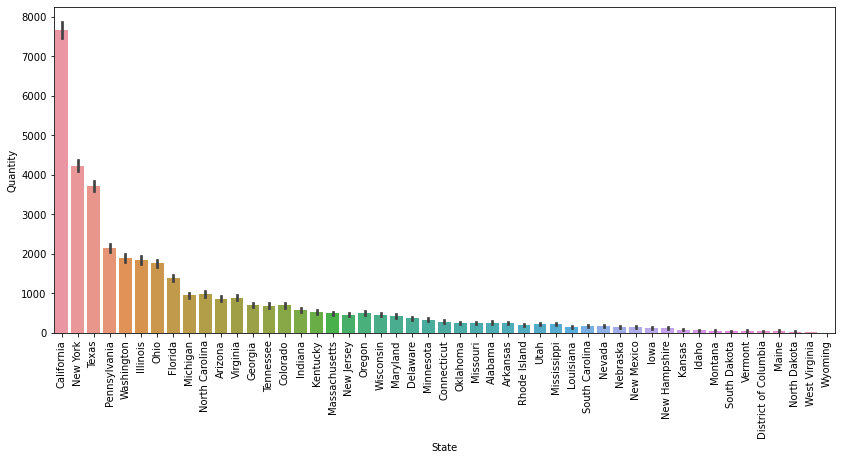

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(data=sales,x='State',y='Quantity',estimator=np.sum,order=sales['State'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Out of all the states California has made the most number of Sales and Wyoming has made the least Sales

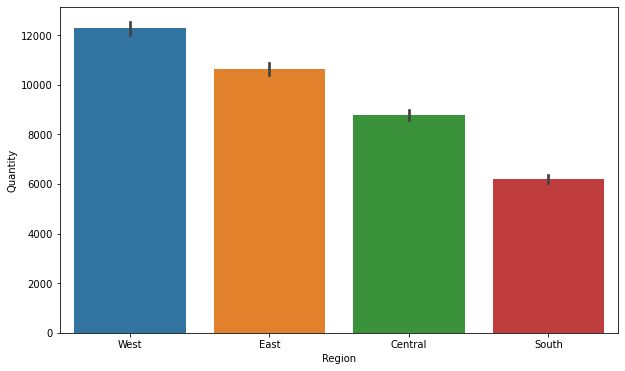

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales,x='Region',y='Quantity',estimator=np.sum,order=sales['Region'].value_counts().index)
plt.show()

West Region has made the more number of Sales and South Region has made the least number of sales

In [19]:
#Top 10 Cities with the highest number of sales 
top_sales=sales.groupby('City')['Sales','Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
top_sales

C:\Users\ASHOK\AppData\Local\Temp/ipykernel_21432/1072298206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_sales=sales.groupby('City')['Sales','Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)


,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Philadelphia,109077.0130,1981
San Francisco,112669.0920,1935
Seattle,119540.7420,1590
Houston,64504.7604,1466
Chicago,48539.5410,1132
Columbus,38706.2430,836
San Diego,47521.0290,670


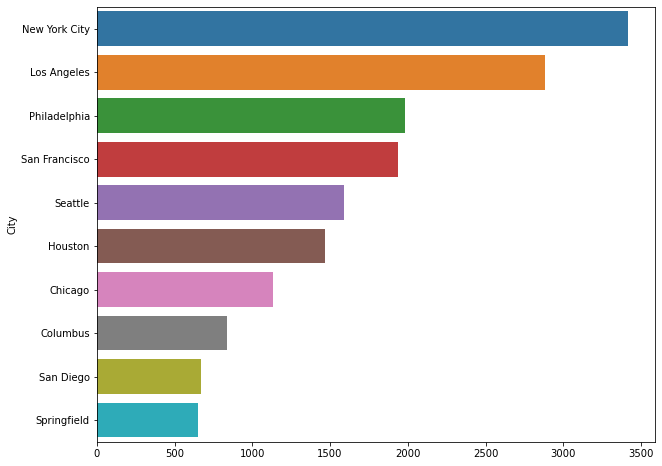

In [20]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_sales['Quantity'].values,y=top_sales['Quantity'].index)
plt.show()

New York and Los Angeles are the cities with the maximum sales count

In [21]:
#Top 10 Products with the highest number of sales 
top_sales_prod=sales.groupby('Product Name')['Sales','Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
top_sales_prod

C:\Users\ASHOK\AppData\Local\Temp/ipykernel_21432/4241852321.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_sales_prod=sales.groupby('Product Name')['Sales','Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)


,Sales,Quantity
Product Name,,
Staples,755.470,215
Staple envelope,1686.812,170
Easy-staple paper,2504.192,150
Staples in misc. colors,478.812,86
KI Adjustable-Height Table,4552.641,74
Avery Non-Stick Binders,217.316,71
Storex Dura Pro Binders,278.586,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,780.456,67
"Situations Contoured Folding Chairs, 4/Set",3641.274,64


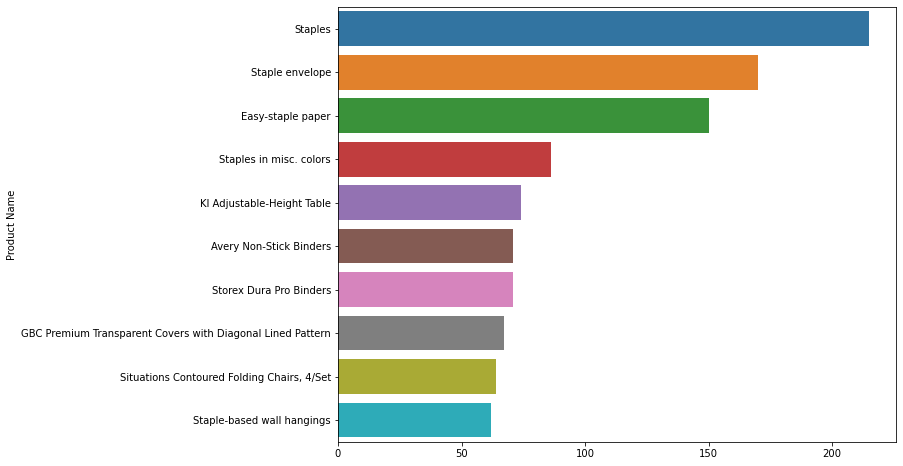

In [22]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_sales_prod['Quantity'].values,y=top_sales_prod['Quantity'].index)
plt.show()

We could see the top 10 selling products in the above plot 

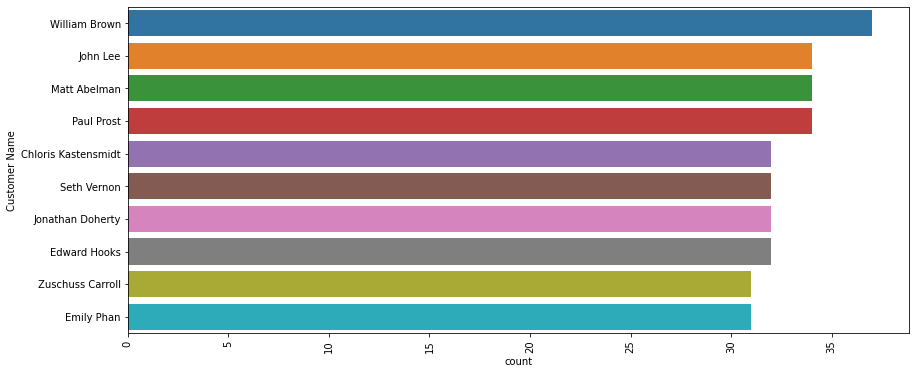

In [23]:
#Top 10 Customers with the highest number of orders
plt.figure(figsize=(14,6))
sns.countplot(data=sales,y='Customer Name',order=sales['Customer Name'].value_counts().head(10).index)
plt.xticks(rotation='vertical')
plt.show()

Displays the top 10 customers who has placed the most number of orders

<AxesSubplot:xlabel='order_year', ylabel='Quantity'>

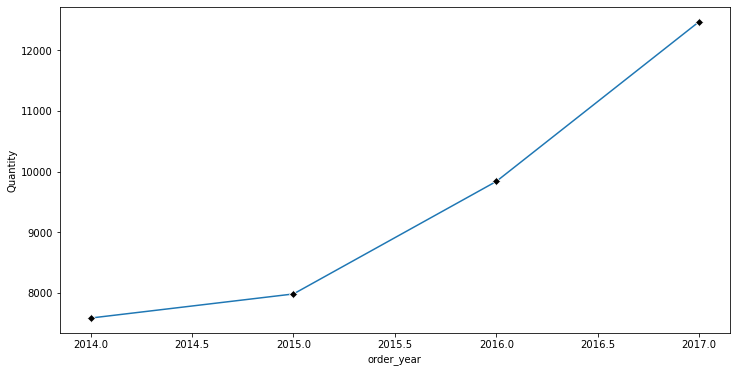

In [24]:
#Number of Yearly Sales
plt.figure(figsize=(12,6))
sns.lineplot(data=sales,x='order_year',y='Quantity',estimator=np.sum,marker='D',markersize=6,markerfacecolor='black',ci=None)

We can clearly see that the number of sales made by the store has increased over the years

#### Analysis with respect to Sales

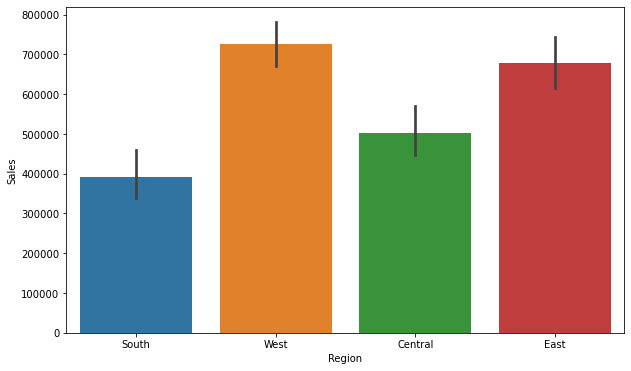

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales,x='Region',y='Sales',estimator=np.sum)
plt.show()


West Region has made most number of sales and has made the most sales amount

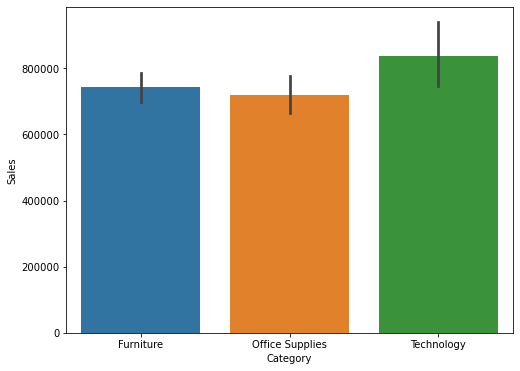

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Category',y='Sales',estimator=np.sum)
plt.show()


We could observe that even though Office Supplies category has made the most number of sales but it has returned the  least total sales amount of all the three Categories and Technology has made least number of sales but has returned the maximum total sales amount.

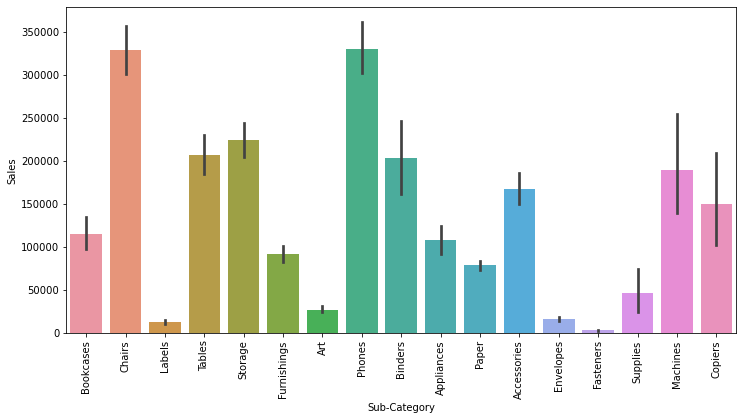

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales,x='Sub-Category',y='Sales',estimator=np.sum)
plt.xticks(rotation='vertical')
plt.show()

In the Sub-Category's Chairs and Phones has retuned the maximum sales amount and Labels and Fasteners have made the minimum sales amount

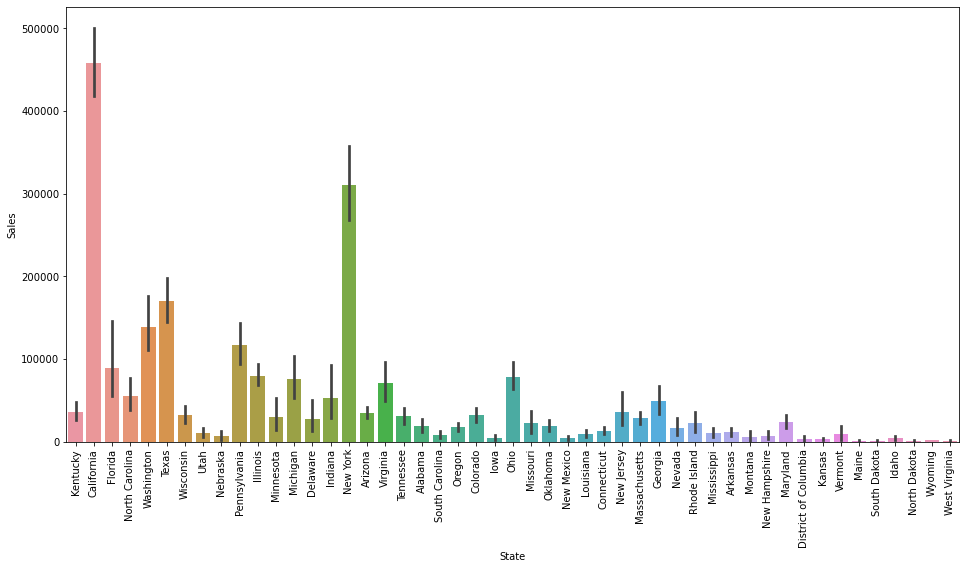

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(data=sales,x='State',y='Sales',estimator=np.sum)
plt.xticks(rotation='vertical')
plt.show()


In [29]:
#Top 10 Cities with the highest total sales amount
top_city=sales.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_city

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

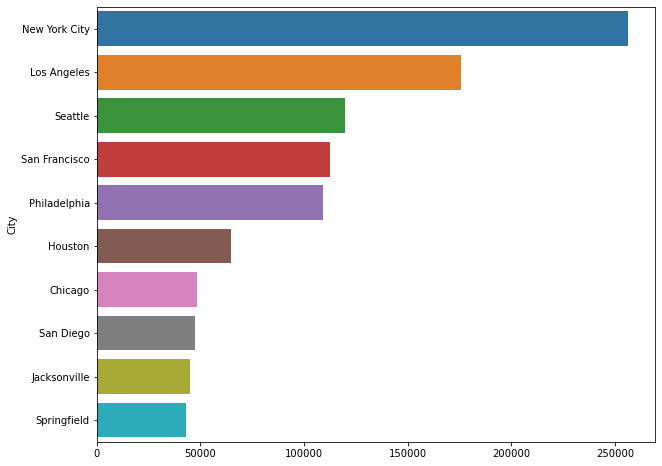

In [30]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_city.values,y=top_city.index)
plt.show()

In [31]:
#Least performing Cities with the lowest total sales amount
least_city=sales.groupby('City')['Sales'].sum().sort_values(ascending=True).head(10)
least_city

City
Abilene            1.392
Elyria             1.824
Jupiter            2.064
Pensacola          2.214
Ormond Beach       2.808
San Luis Obispo    3.620
Springdale         4.300
Layton             4.960
Keller             6.000
Missouri City      6.370
Name: Sales, dtype: float64

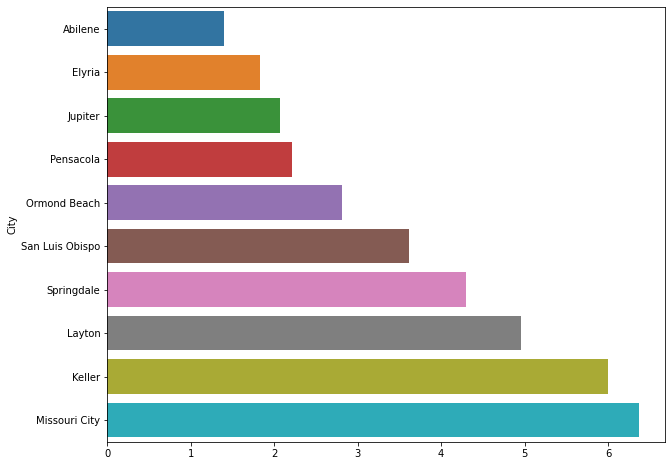

In [32]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=least_city.values,y=least_city.index)
plt.show()

In [33]:
#Top 10 Products with the highest total sales amount
top_prod=sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_prod

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

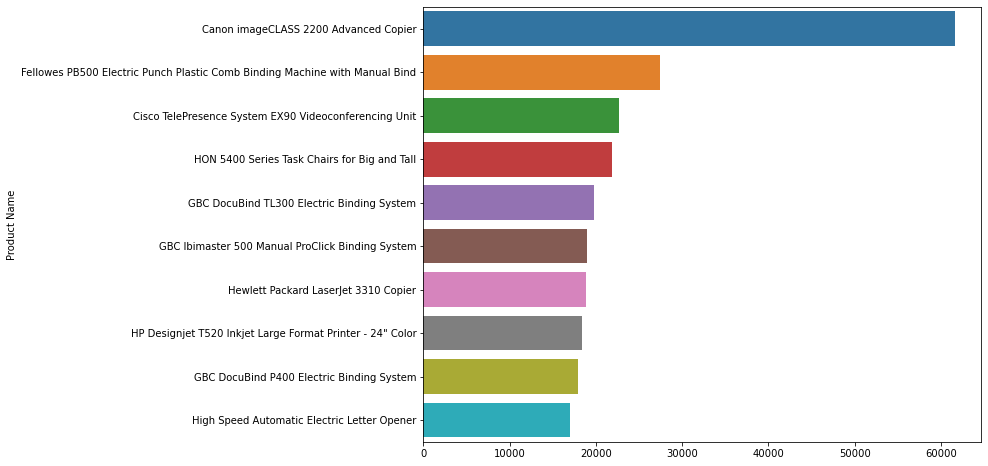

In [35]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_prod.values,y=top_prod.index)
plt.show()

Top 10 Products that contributed to the total sales amounts

In [36]:
#Least performing Products with the lowest total sales amount
least_prod=sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10)
least_prod

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Newell 308                                                          8.400
Name: Sales, dtype: float64

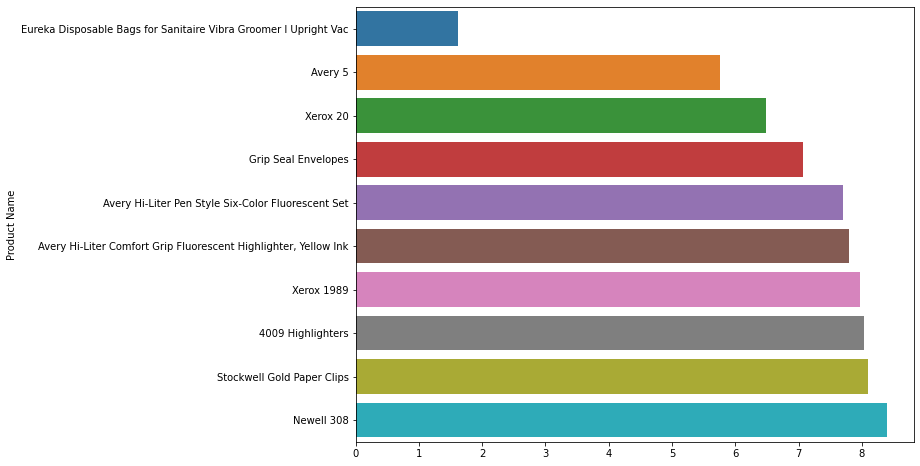

In [37]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=least_prod.values,y=least_prod.index)
plt.show()

In [38]:
#Top 10 Customers with the highest total sales amount
top_cust=sales.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_cust


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

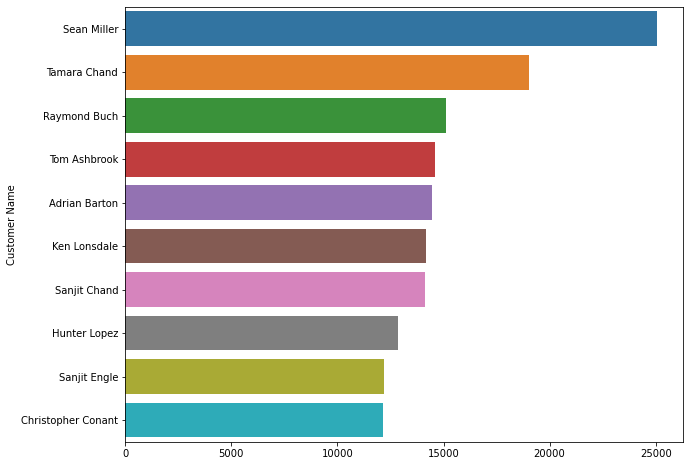

In [39]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_cust.values,y=top_cust.index)
plt.show()

In [40]:
#10 Customers with the lowest total sales amount
low_cust=sales.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).head(10)
low_cust


Customer Name
Thais Sissman       4.833
Lela Donovan        5.304
Carl Jackson       16.520
Mitch Gastineau    16.739
Roy Skaria         22.328
Susan Gilcrest     47.946
Ricardo Emerson    48.360
Larry Blacks       50.188
Adrian Shami       58.820
Jasper Cacioppo    71.263
Name: Sales, dtype: float64

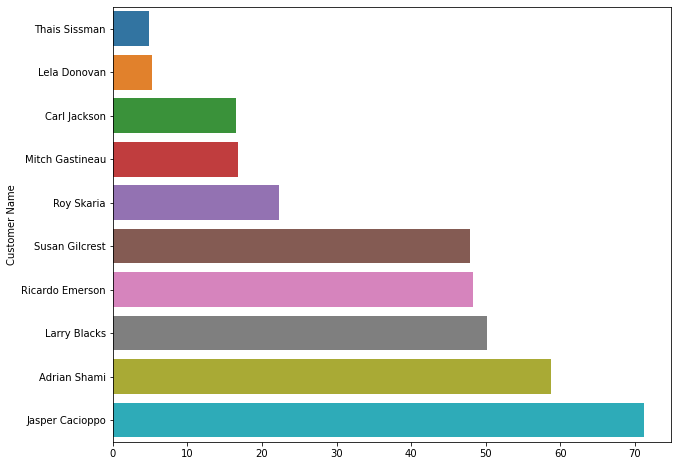

In [41]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=low_cust.values,y=low_cust.index)
plt.show()

<AxesSubplot:xlabel='order_year', ylabel='Sales'>

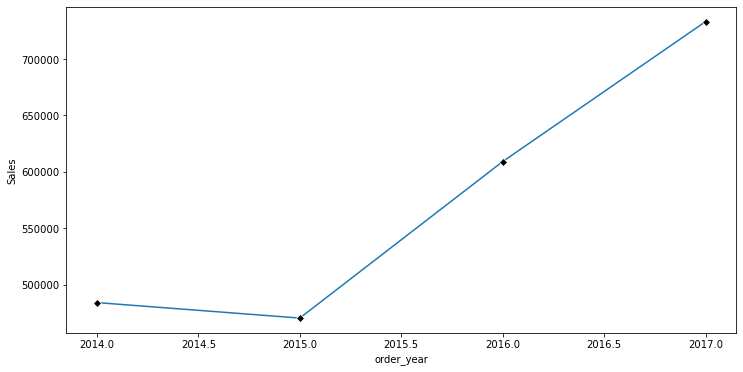

In [42]:
#Yearly Sales
plt.figure(figsize=(12,6))
sns.lineplot(data=sales,x='order_year',y='Sales',estimator=np.sum,marker='D',markersize=6,markerfacecolor='black',ci=None)

We could see that the Total Sales has dipped a little in the year 2015 but has gradually increased in the upcoming years

<AxesSubplot:xlabel='order_year', ylabel='Sales'>

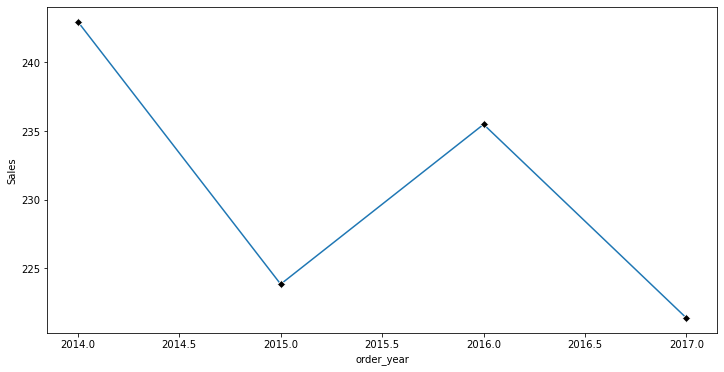

In [43]:
#Yearly Average Sales
plt.figure(figsize=(12,6))
sns.lineplot(data=sales,x='order_year',y='Sales',estimator=np.mean,marker='D',markersize=6,markerfacecolor='black',ci=None)

Average sales over the years is displayed in the plot

<AxesSubplot:xlabel='order_year', ylabel='Profit'>

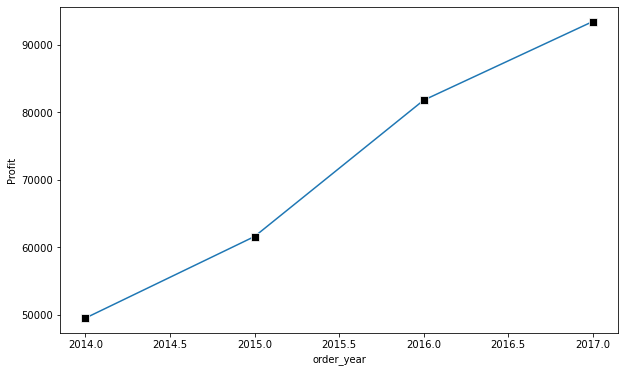

In [44]:
#Profit over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=sales,x='order_year',y='Profit',estimator=np.sum,marker='s',markersize=8,markerfacecolor='black',ci=None)


Profit has increased gradually over the years without a decline

<AxesSubplot:xlabel='order_year', ylabel='Profit'>

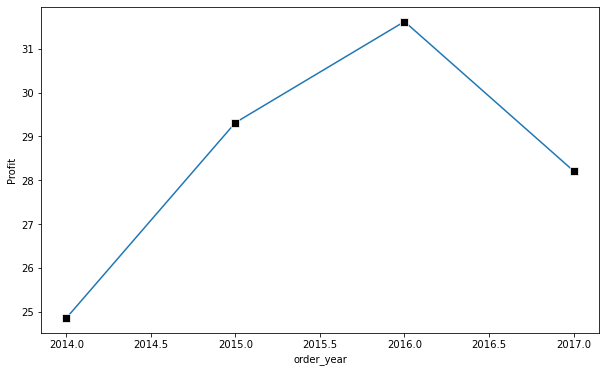

In [45]:
#Average Profit over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=sales,x='order_year',y='Profit',estimator=np.mean,marker='s',markersize=8,markerfacecolor='black',ci=None)


The average profit has dipped in the year 2017

### Bivariate/Multivariate Analysis

In [46]:
#Category and Sub-Category wise Sales and profit
sales.groupby(by=['Category','Sub-Category']).agg({'Sales':'counts','Sales':sum,'Profit':sum,'Quantity':sum})

Sales      Profit  Quantity
Category        Sub-Category                                   
Furniture       Bookcases     114879.9963  -3472.5560       868
                Chairs        328449.1030  26590.1663      2356
                Furnishings    91705.1640  13059.1436      3563
                Tables        206965.5320 -17725.4811      1241
Office Supplies Appliances    107532.1610  18138.0054      1729
                Art            27118.7920   6527.7870      3000
                Binders       203412.7330  30221.7633      5974
                Envelopes      16476.4020   6964.1767       906
                Fasteners       3024.2800    949.5182       914
                Labels         12486.3120   5546.2540      1400
                Paper          78479.2060  34053.5693      5178
                Storage       223843.6080  21278.8264      3158
                Supplies       46673.5380  -1189.0995       647
Technology      Accessories   167380.3180  41936.6357      2976
                Copiers       149528.0300  55617.8249       234
                Machines      189238.6310   3384.7569       440
                Phones        330007.0540  44515.7306      3289

In [47]:
#Region wise Sales and Profit
sales.groupby(by='Region').agg({'Sales':sum,'Profit':sum})

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


In [48]:
#Monthly Categorical Sales, Profit, Quantity and Discount 
sales.groupby(['order_year','Category','order_month']).agg({'Sales':sum,'Profit':sum,'Quantity':sum,'Discount':sum})

Sales      Profit  Quantity  \
order_year Category        order_month                                     
2014       Furniture       1             6242.5250    805.4665        70   
                           2             1839.6580    120.6917        23   
                           3            14573.9560  -1128.6550       131   
                           4             7944.8370    554.3801        81   
                           5             6912.7870   -349.8776        97   
                           6            13206.1256    596.3153       122   
                           7            10821.0510    374.2467       114   
                           8             7320.3465    663.4717       107   
                           9            23816.4808   1858.5976       208   
                           10           12304.2470    249.1645       130   
                           11           21564.8727   -297.8958       228   
                           12           30645.9665   2011.8198       312   
           Office Supplies 1             4851.0800    788.9506       169   
                           2             1071.7240    176.0910       103   
                           3             8605.8790   1270.4133       370   
                           4            11155.0740   1000.2086       345   
                           5             7135.6240   1747.2044       281   
                           6            12953.0370   3031.4326       322   
                           7            15121.2080  -2482.0172       333   
                           8            11379.4620   2767.6007       376   
                           9            27423.2980   6699.5402       624   
                           10            7211.1280   1117.6406       332   
                           11           26862.4360   4411.9560       741   
                           12           18006.4620   2064.3953       573   
           Technology      1             3143.2900    855.7736        45   
                           2             1608.5100    565.5257        33   
                           3            32511.1740    356.9716        84   
                           4             9195.4340   1934.2465       110   
                           5             9599.8760   1341.3828        88   
                           6             8435.9650   1348.7765        77   
                           7             8004.1340   1266.2879       103   
                           8             9209.6600   1887.0326       126   
                           9            30537.5720   -230.0384       168   
                           10           11938.0180   2081.4522       111   
                           11           30201.4080   5178.0667       250   
                           12           20893.1920   4907.3548       194   
2015       Furniture       1            11739.9416  -3014.2000        88   
                           2             3134.3740    394.8948        45   
                           3            12499.7830   1455.0573       111   
                           4            10475.6985    338.6502       107   
                           5             9374.9505    900.5847       126   
                           6             7714.1790   -412.6597       112   
                           7            13674.4200   -325.0938       162   
                           8             9638.5922   -487.4709       112   
                           9            26273.0230   1350.1185       205   
                           10           12026.6235   -605.5163       140   
                           11           30880.8325   2992.0240       310   
                           12           23085.8192    428.8141       257   
           Office Supplies 1             1808.7800    589.8969       110   
                           2             5368.0670   1814.1018       149   
                           3            15882.5470   5407.8482       314   
                 

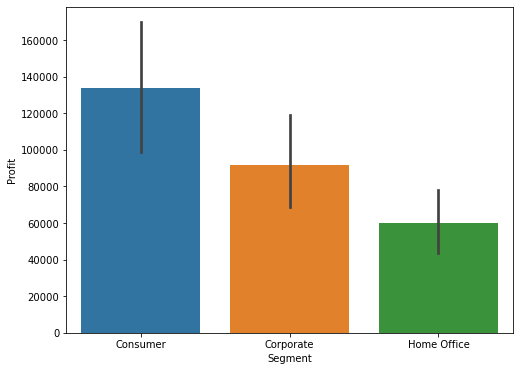

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Segment',y='Profit',estimator=np.sum)
plt.show()


Consumer segment is the most profitable 

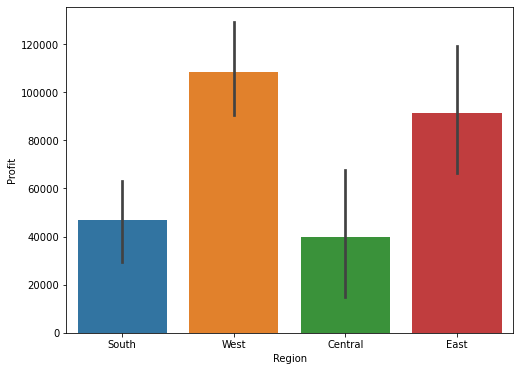

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Region',y='Profit',estimator=np.sum)
plt.show()


West and East Regions are the most profitable and Furniture Category in the Central Region is the least profitable

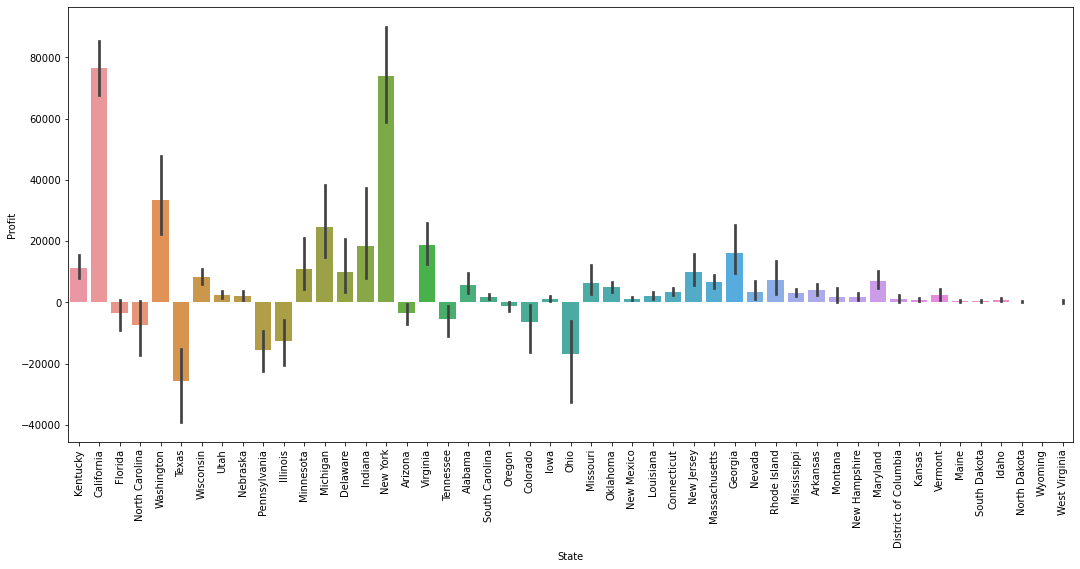

In [51]:
plt.figure(figsize=(18,8))
sns.barplot(data=sales,x='State',y='Profit',estimator=np.sum)
plt.xticks(rotation='vertical')
plt.show()


California and New York are the most profitable states. We can also note that a few states like Texas,Ohio,Pennsylvania,Illinois,etc have generated loss

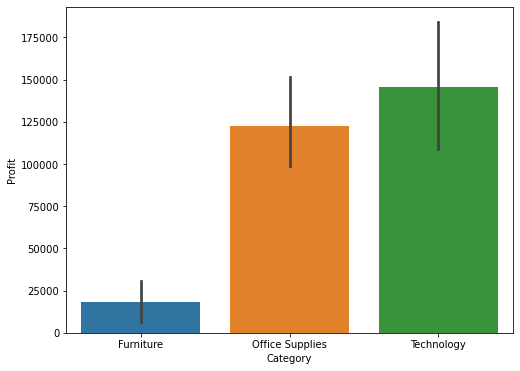

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(data=sales,x='Category',y='Profit',estimator=np.sum)
plt.show()

Technology is the most profitable Category and Furniture is the least profitable Category

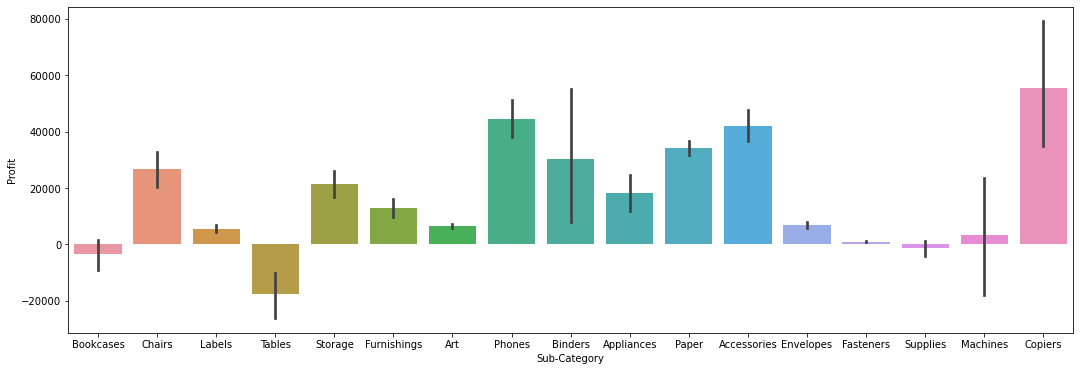

In [53]:
plt.figure(figsize=(18,6))
sns.barplot(data=sales,x='Sub-Category',y='Profit',estimator=np.sum)
plt.show()

Copiers is the most profitable Sub-Category and Tables has generated loss

In [54]:
#Top 10 Cities with the most profit
top_cities=sales.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
top_cities

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64

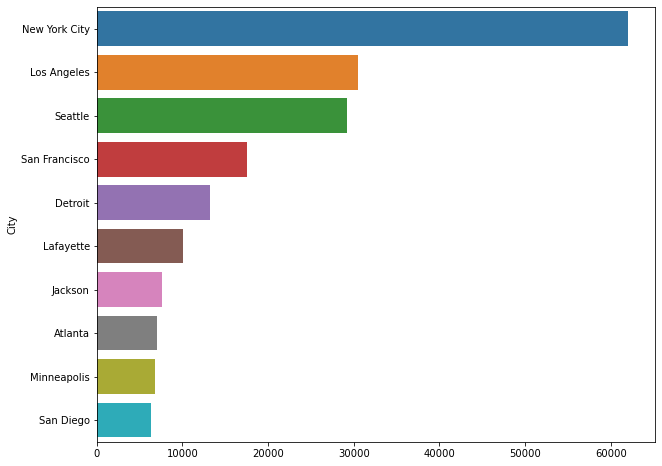

In [55]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_cities.values,y=top_cities.index)
plt.show()

In [56]:
#Cities with the most loss
loss_cities=sales.groupby('City')['Profit'].sum().sort_values(ascending=True).head(10)
loss_cities

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64

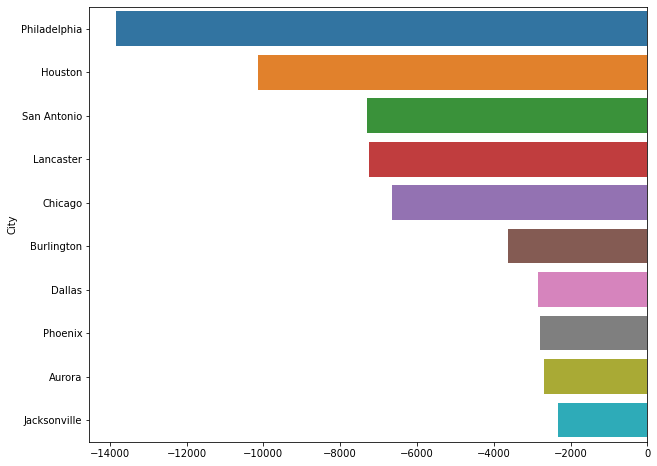

In [57]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=loss_cities.values,y=loss_cities.index)
plt.show()

In [58]:
#Top 10 profitable products
top_products=sales.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

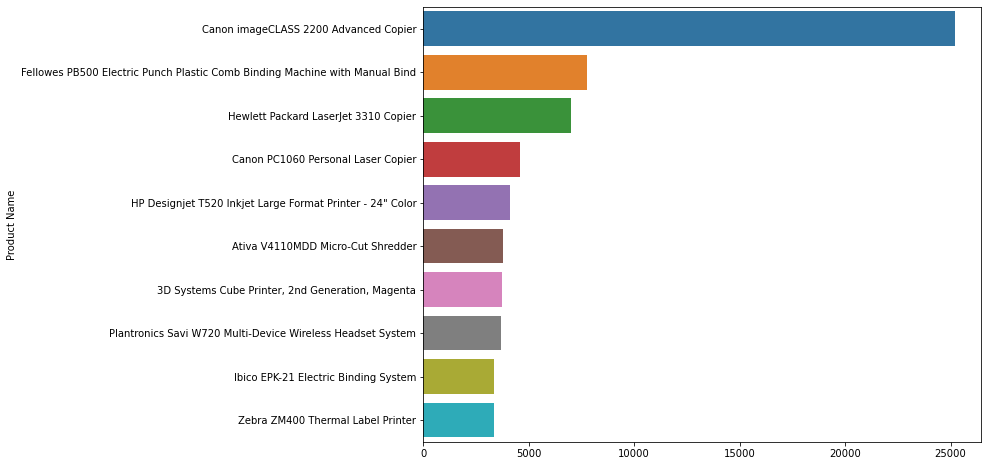

In [59]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_products.values,y=top_products.index)
plt.show()

In [60]:
#Least profitable products
loss_products=sales.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head(10)
loss_products

Product Name
Cubify CubeX 3D Printer Double Head Print                           -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                           -4589.9730
Cubify CubeX 3D Printer Triple Head Print                           -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.1156
Bush Advantage Collection Racetrack Conference Table                -1934.3976
GBC DocuBind P400 Electric Binding System                           -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.0784
Martin Yale Chadless Opener Electric Letter Opener                  -1299.1836
Balt Solid Wood Round Tables                                        -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
Name: Profit, dtype: float64

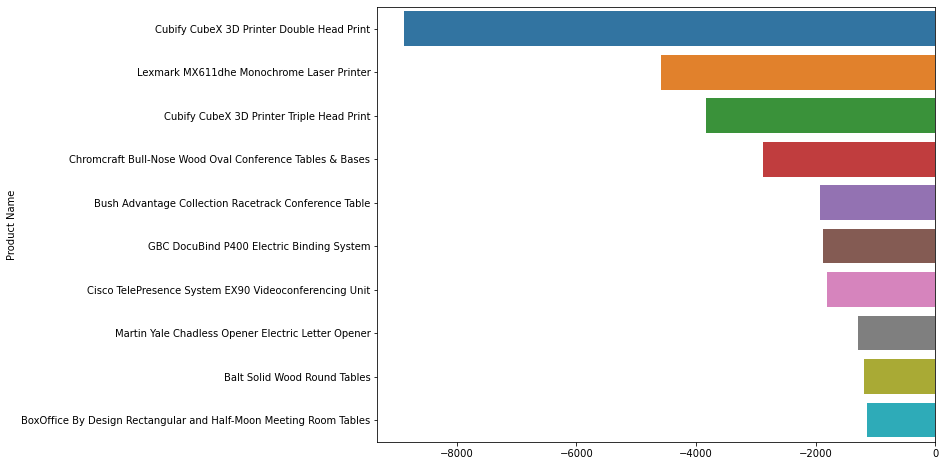

In [61]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=loss_products.values,y=loss_products.index)
plt.show()

In [62]:
#Top 10 Profitable Customers
top_customers=sales.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_customers

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

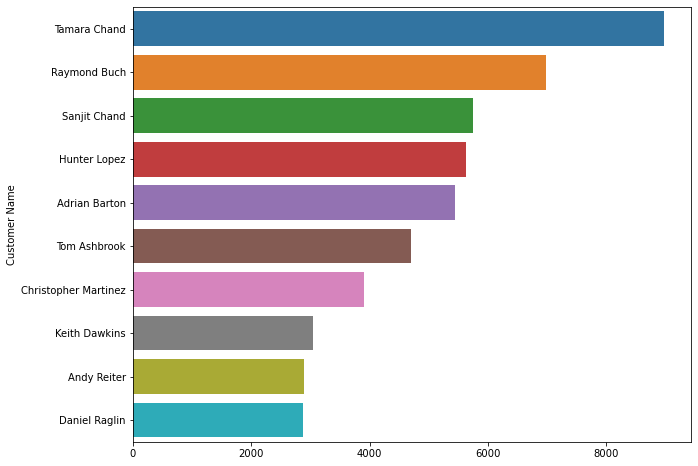

In [63]:
#Visual Representation
plt.figure(figsize=(10,8))
sns.barplot(x=top_customers.values,y=top_customers.index)
plt.show()

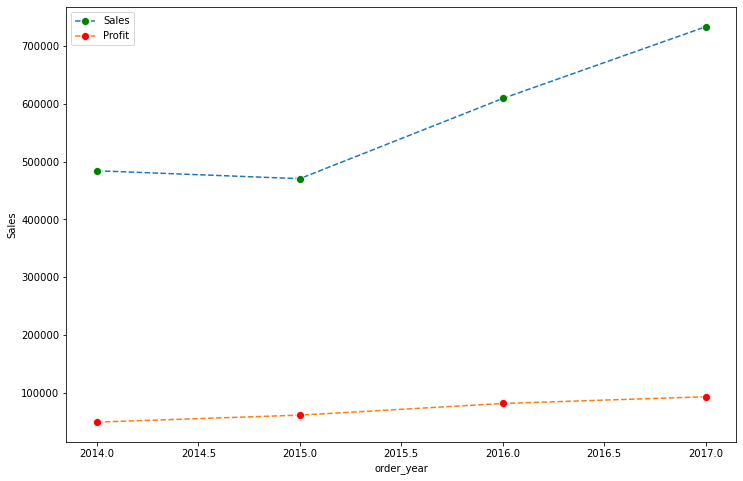

In [64]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sales,x='order_year',y='Sales',estimator=np.sum,marker='o',markersize=8,markerfacecolor='g',ci=None,linestyle='--',label='Sales')
sns.lineplot(data=sales,x='order_year',y='Profit',estimator=np.sum,marker='o',markersize=8,markerfacecolor='r',ci=None,linestyle='--',label='Profit')
plt.legend()

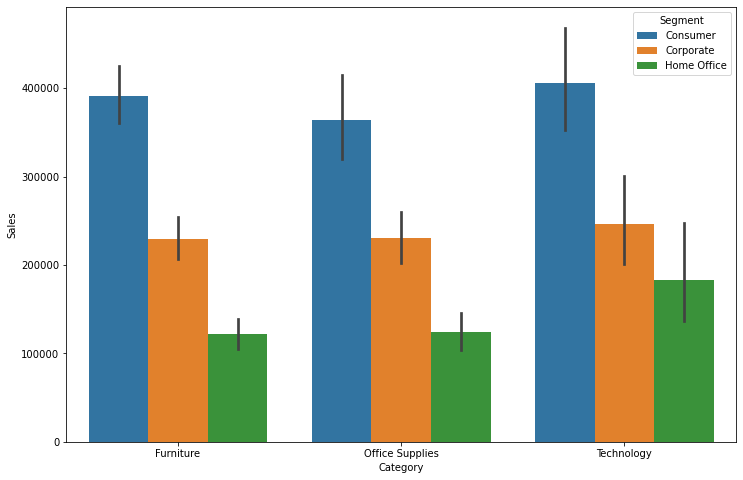

In [65]:
#Segment wise Categorical sales
plt.figure(figsize=(12,8))
sns.barplot(data=sales,x='Category',y='Sales',hue='Segment',estimator=np.sum)
plt.show()


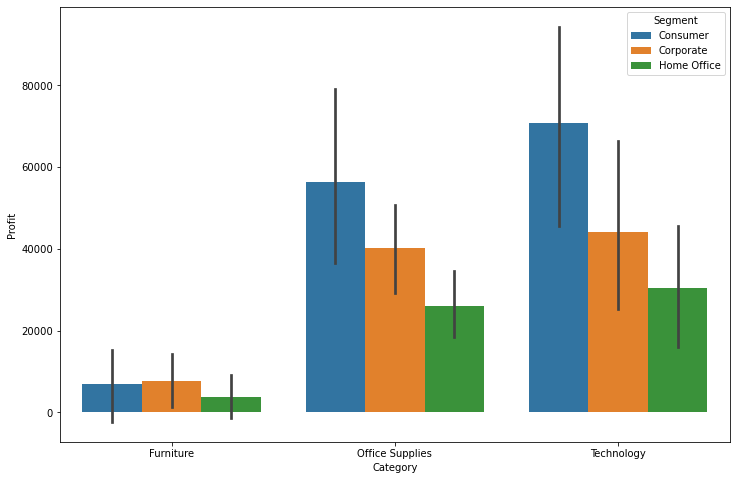

In [66]:
#Segment wise Categorical Profit
plt.figure(figsize=(12,8))
sns.barplot(data=sales,x='Category',y='Profit',hue='Segment',estimator=np.sum)
plt.show()


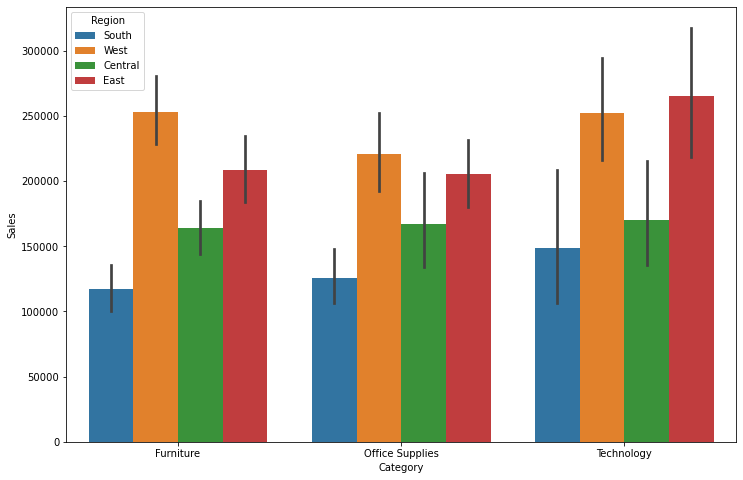

In [67]:
#Region wise Categorical sales
plt.figure(figsize=(12,8))
sns.barplot(data=sales,x='Category',y='Sales',hue='Region',estimator=np.sum)
plt.show()


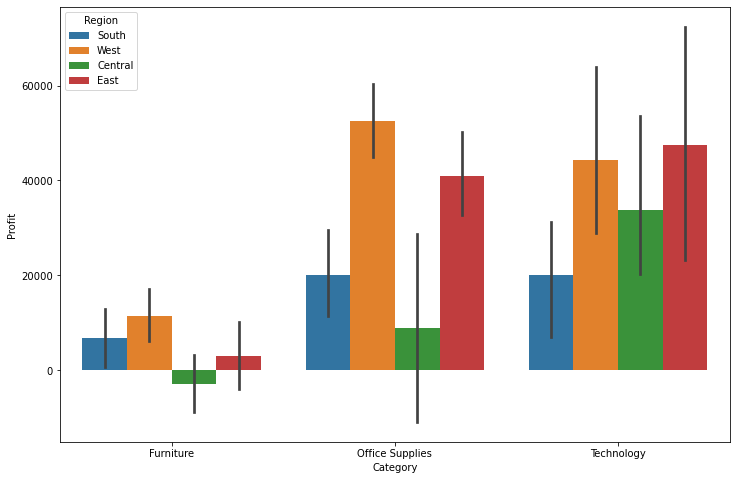

In [68]:
#Region wise Categorical Profit
plt.figure(figsize=(12,8))
sns.barplot(data=sales,x='Category',y='Profit',hue='Region',estimator=np.sum)
plt.show()


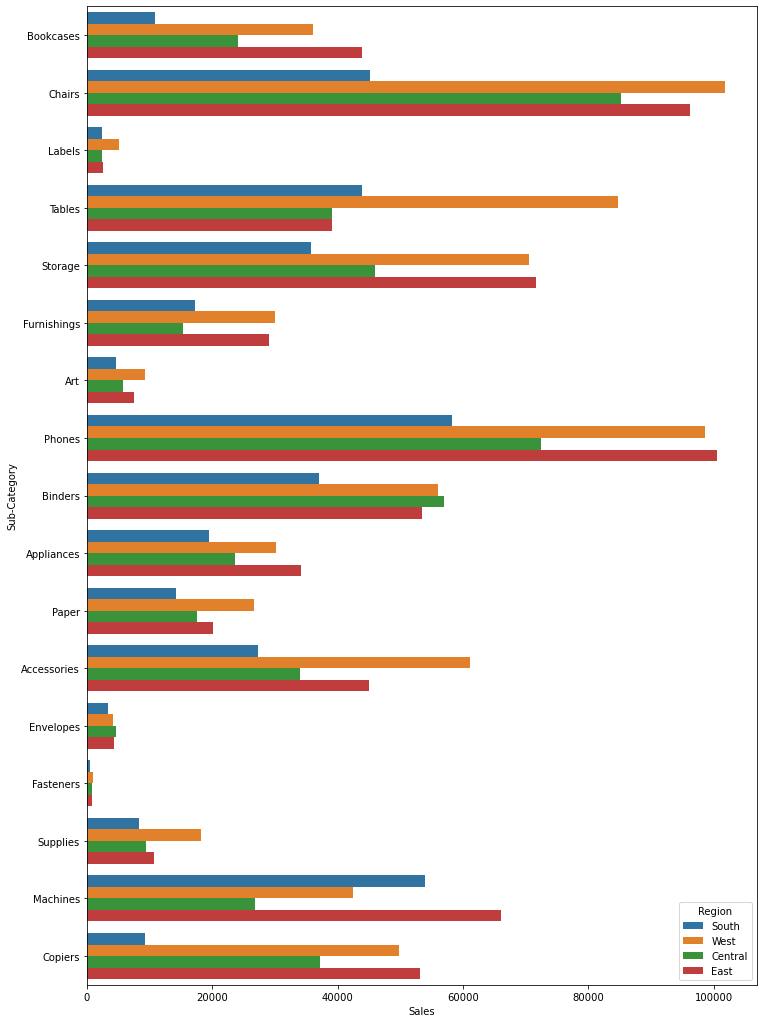

In [69]:
#Region wise Sub-Categorical sales
plt.figure(figsize=(12,18))
sns.barplot(data=sales,y='Sub-Category',x='Sales',hue='Region',estimator=np.sum,ci=None)
plt.show()


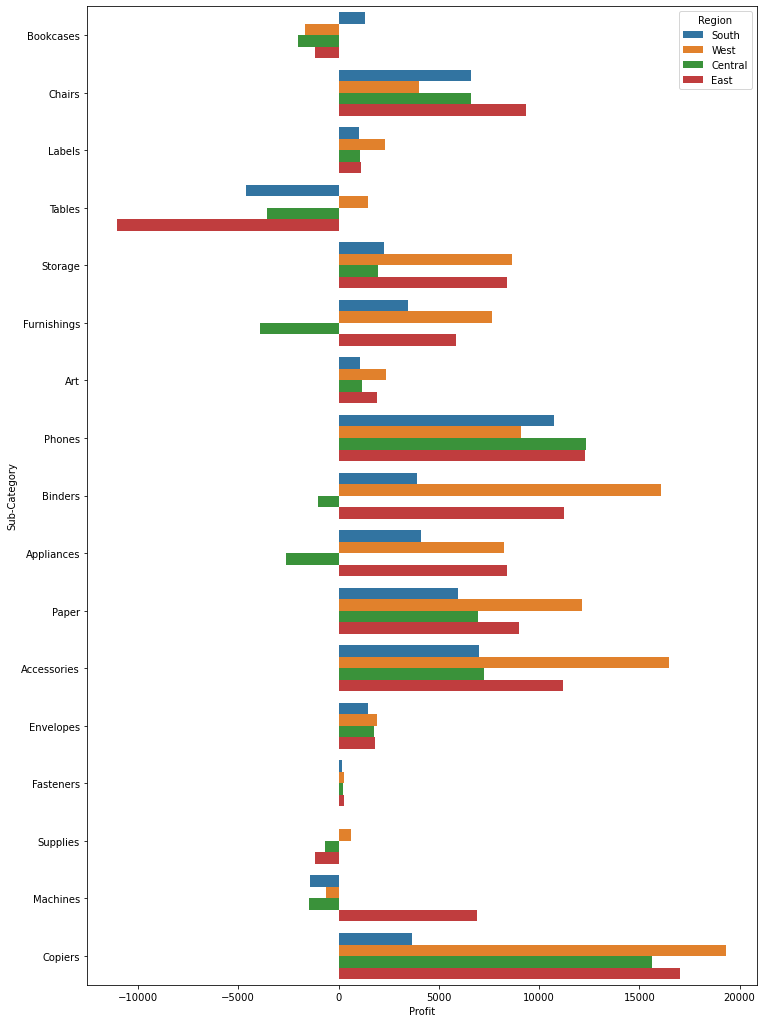

In [70]:
#Region wise Sub-Categorical Profit
plt.figure(figsize=(12,18))
sns.barplot(data=sales,y='Sub-Category',x='Profit',hue='Region',estimator=np.sum,ci=None)
plt.show()


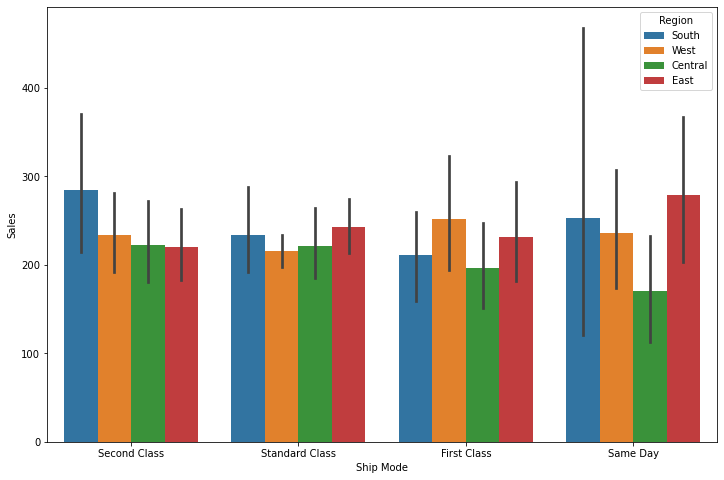

In [71]:
#Region wise Ship Mode
plt.figure(figsize=(12,8))
sns.barplot(data=sales,x='Ship Mode',y='Sales',hue='Region')
plt.show()


### Case study final conclusion:
-We can observe that most people did not opt for same day shipping and a maximum number of people have opted for Standard shipping. This maybe because of the high shipping charges for fast shipping.

-Consumer Segment has made the most Sales and is the most Profitable.

-The South Region is the least performing Region in terms of Sales. The Central Region, even though it has made more sales than the South Region, Central is the least profitable Region.

-California and New York are the most profitable states

-The Category Office Supplies has made the max number of sales but it is not the most profitable. The Category Technology made the least number of sales but it is the most profitable category.

-Sub-Categories like Bookcases, Tables and Supplies has generated loss.

-Tables Sub-Category in the East Region has generated the maximum loss.

-More focus is needed on staples related products as they are the most ordered products.

-Philadelphia, Houston, Chicago has been reporting maximum sales but they are generating huge loss.

-Tamara Chand,Raymond Buch,Sanjit Chand and Sean Miller are some of the profitable Customers. 

